## **Loan Default Prediction Model Development**

#### **Setup**

In [1]:
# Data manipulation 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Imbalanced data handling
from imblearn.over_sampling import SMOTE

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Cross-validation and evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Model saving
import joblib

#### **Data Preparation**

In [2]:
# Read the cleaned dataset
df = pd.read_csv("../data/processed/home_equity_loan_applications_cleaned.csv")
df.head()

,defaulted,loan_amount,mortgage_due,property_value,loan_reason,job_type,years_on_job,num_derogatory,num_delinquencies,credit_age,...,property_value_missing_flag,loan_reason_missing_flag,job_type_missing_flag,years_on_job_missing_flag,num_derogatory_missing_flag,num_delinquencies_missing_flag,credit_age_missing_flag,num_inquiries_missing_flag,num_credit_lines_missing_flag,debt_income_ratio_missing_flag
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,0,0,0,0,0,0,0,0,0,1
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,...,0,0,0,0,0,0,0,0,0,1
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,...,0,0,0,0,0,0,0,0,0,1
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,...,1,1,1,1,1,1,1,1,1,1
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# Check the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   defaulted                       5960 non-null   int64  
 1   loan_amount                     5960 non-null   int64  
 2   mortgage_due                    5960 non-null   float64
 3   property_value                  5960 non-null   float64
 4   loan_reason                     5960 non-null   object 
 5   job_type                        5960 non-null   object 
 6   years_on_job                    5960 non-null   float64
 7   num_derogatory                  5960 non-null   float64
 8   num_delinquencies               5960 non-null   float64
 9   credit_age                      5960 non-null   float64
 10  num_inquiries                   5960 non-null   float64
 11  num_credit_lines                5960 non-null   float64
 12  debt_income_ratio               59

In [4]:
# Define target variables and features
X = df.drop("defaulted", axis=1)
y = df["defaulted"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the train and test sets
print(f"Shape of the training set: {X_train.shape}")
print(f"Shape of the testing set: {X_test.shape}")

Shape of the training set: (4172, 23)
Shape of the testing set: (1788, 23)


In [5]:
# Create dummy variable for one-hot-encoding 
X_train_encoded = pd.get_dummies(X_train)#, drop_first=True)
X_test_encoded = pd.get_dummies(X_test)#, drop_first=True)

# Check the encoded dataframe
X_train_encoded.head()

,loan_amount,mortgage_due,property_value,years_on_job,num_derogatory,num_delinquencies,credit_age,num_inquiries,num_credit_lines,debt_income_ratio,...,num_credit_lines_missing_flag,debt_income_ratio_missing_flag,loan_reason_DebtCon,loan_reason_HomeImp,job_type_Mgr,job_type_Office,job_type_Other,job_type_ProfExe,job_type_Sales,job_type_Self
5774,45900,52720.0,115224.0,7.0,0.0,1.0,126.116518,0.0,21.0,34.818262,...,0,1,True,False,False,False,True,False,False,False
5098,27300,97373.0,126102.0,10.0,0.0,1.0,139.132598,0.0,28.0,39.173554,...,0,0,True,False,False,True,False,False,False,False
5428,31900,23517.0,47805.0,0.0,0.0,0.0,78.813600,0.0,7.0,16.727748,...,0,0,True,False,False,False,True,False,False,False
257,5500,71644.0,72696.0,4.0,2.0,0.0,150.865845,0.0,22.0,40.442568,...,0,0,False,True,False,False,False,False,True,False
507,7100,54000.0,74800.0,7.5,1.0,1.0,71.000000,4.0,18.0,34.818262,...,0,1,True,False,True,False,False,False,False,False


In [6]:
# Check the total columns
X_train_encoded.columns

Index(['loan_amount', 'mortgage_due', 'property_value', 'years_on_job',
       'num_derogatory', 'num_delinquencies', 'credit_age', 'num_inquiries',
       'num_credit_lines', 'debt_income_ratio', 'mortgage_due_missing_flag',
       'property_value_missing_flag', 'loan_reason_missing_flag',
       'job_type_missing_flag', 'years_on_job_missing_flag',
       'num_derogatory_missing_flag', 'num_delinquencies_missing_flag',
       'credit_age_missing_flag', 'num_inquiries_missing_flag',
       'num_credit_lines_missing_flag', 'debt_income_ratio_missing_flag',
       'loan_reason_DebtCon', 'loan_reason_HomeImp', 'job_type_Mgr',
       'job_type_Office', 'job_type_Other', 'job_type_ProfExe',
       'job_type_Sales', 'job_type_Self'],
      dtype='object')

In [7]:
# Apply StandardScaler 
scaler = StandardScaler()

# Fit and transform on training set 
X_train_scaled = scaler.fit_transform(X_train_encoded)

# Only transform on test set
X_test_scaled = scaler.transform(X_test_encoded)

In [8]:
# Check the scaled data
pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns).head()

,loan_amount,mortgage_due,property_value,years_on_job,num_derogatory,num_delinquencies,credit_age,num_inquiries,num_credit_lines,debt_income_ratio,...,num_credit_lines_missing_flag,debt_income_ratio_missing_flag,loan_reason_DebtCon,loan_reason_HomeImp,job_type_Mgr,job_type_Office,job_type_Other,job_type_ProfExe,job_type_Sales,job_type_Self
0,2.463891,-0.475467,0.237266,-0.245096,-0.284595,0.613690,-0.639058,-0.698683,-0.025570,0.125039,...,-0.189076,1.952433,0.648830,-0.648830,-0.387227,-0.437012,1.125785,-0.522976,-0.140711,-0.187712
1,0.781388,0.560598,0.427862,0.163329,-0.284595,0.613690,-0.484694,-0.698683,0.677594,0.734902,...,-0.189076,-0.512181,0.648830,-0.648830,-0.387227,2.288269,-0.888269,-0.522976,-0.140711,-0.187712
2,1.197491,-1.153053,-0.943995,-1.198088,-0.284595,-0.372184,-1.200044,-0.698683,-1.431899,-2.408138,...,-0.189076,-0.512181,0.648830,-0.648830,-0.387227,-0.437012,1.125785,-0.522976,-0.140711,-0.187712
3,-1.190579,-0.036382,-0.507875,-0.653521,2.194173,-0.372184,-0.345544,-0.698683,0.074882,0.912600,...,-0.189076,-0.512181,-1.541235,1.541235,-0.387227,-0.437012,-0.888269,-0.522976,7.106770,-0.187712
4,-1.045847,-0.445768,-0.471010,-0.177025,0.954789,0.613690,-1.292709,1.681803,-0.326927,0.125039,...,-0.189076,1.952433,0.648830,-0.648830,2.582463,-0.437012,-0.888269,-0.522976,-0.140711,-0.187712


#### **Model Development**

We already prepared the dataset to be ready for this model development phase. In this part, we are going to implement various classification models to fit onto the training set so as to let the models learn from the pattern and be able to identify defaulted and non-defaulted loans. We will have to do test experiments multiple times to evaluate the results based on different approaches.

- **Classification Models**: Logistic Regression, Decistion Tree Classifier, Random Forest Classifier, and XGBoost Classifier will be used to train the data.

- **Evaluation Metrics**: Accuracy Score, Recall Score, Precision Score, and F1 Score will be used to evaluate the model. 

- **Data Balancing**: Since the target variable is highly imbalanced to the non-defaulted classes, we will also handle this by applying oversampling or downsampling to balance the dataset.

- **Hyperparameter Tuning**: After training on the base models without clearly defined parameters, we are going to use GridSearchCV to find the optimal parameters for the models with highest performance. 



In [9]:
# Define a function to plot confusion matrix from the predictions
def metrics_score(y_test, y_pred):
    print("Classification Report of the Predictions:\n")
    print(classification_report(y_test, y_pred))
    print("="*50)

    # Calculate accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")
    scores = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }
    scores_df = pd.DataFrame(scores, index=[0])

    print("Classification Metric Scores:\n")
    print(scores_df)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Generate custom labels with TP, FP, etc.
    group_names = ["TN", "FP", "FN", "TP"]
    group_counts = [f"{value:0.0f}" for value in cm.flatten()]
    group_percentages = [f"{value:.2%}" for value in cm.flatten() / np.sum(cm)]
    labels = [f"{name}\nCount: {count}\n{percent}" for name, count, percent in zip(group_names, group_counts, group_percentages)]
    labels = np.array(labels).reshape(2, 2)

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', 
                xticklabels=['Non-defaulted', 'Defaulted'], 
                yticklabels=['Non-defaulted', 'Defaulted'])
    
    plt.title("Confusion Matrix", fontsize=16)
    plt.ylabel('Actual', fontsize=12)
    plt.xlabel('Predicted', fontsize=12)
    plt.show()

In [10]:
# Define a function plot Precision-Recall Curve for Binary Classification
def plot_precision_recall(y_test, y_pred_proba, model):
    plt.figure(figsize=(8, 6))

    # Calculate precision and recall
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

    plt.plot(thresholds, precisions[:-1], label='Precision')
    plt.plot(thresholds, recalls[:-1], label='Recall')
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title(f"{model} Precision and Recall vs Threshold", fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()

#### **Logistic Regression Model**

In [11]:
# Define the logistic regression model
logistic_regression_model = LogisticRegression(random_state=42)

# Fit the training data
logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

Classification Report of the Predictions:

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1389
           1       0.82      0.61      0.70       399

    accuracy                           0.88      1788
   macro avg       0.86      0.78      0.81      1788
weighted avg       0.88      0.88      0.88      1788

Classification Metric Scores:

   Accuracy  Precision   Recall  F1 Score
0   0.88311   0.859021  0.78454  0.812959


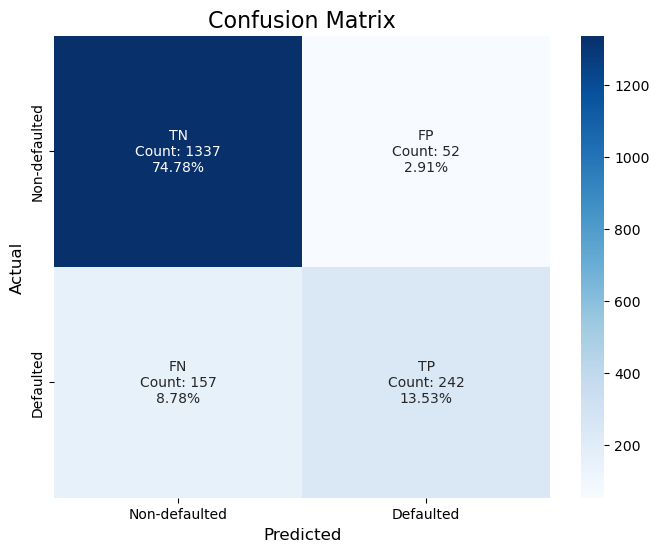

In [12]:
# Predicting on the testing set 
y_pred = logistic_regression_model.predict(X_test_scaled)
y_pred_proba = logistic_regression_model.predict_proba(X_test_scaled)[:, 1]

# Check the performance for evaluation 
metrics_score(y_test, y_pred)

**Findings**: The Logistic Regression model seems to make a lot of incorrect predictions for the positive class (`Defaulted`).

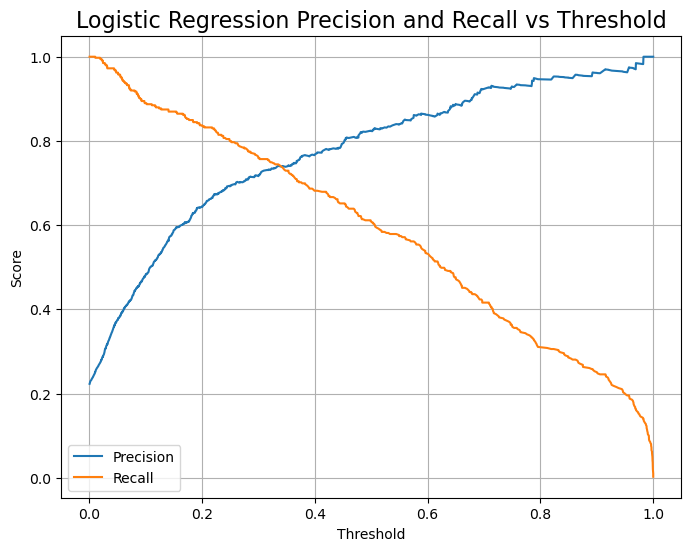

In [13]:
# Check the PR curve
plot_precision_recall(y_test, y_pred_proba, "Logistic Regression")

**Findings**: We can see a trade-off between the precision score and recall score here as the threshold increases, the precision is high but we sacrifice recall. 

- The ideal case for our task would be to prioritize **Recall** as we do not want to have high false negatives (**Defaulted predicted as Non-defaulted**)

- We would also need reasonable precision as well, so it is important to choose a model that can give off these results.

- Based on the PR curve, the precision and recall are balanced at around 0.32 threshold.

Classification Report of the Predictions:

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1389
           1       0.73      0.75      0.74       399

    accuracy                           0.88      1788
   macro avg       0.83      0.84      0.83      1788
weighted avg       0.88      0.88      0.88      1788

Classification Metric Scores:

   Accuracy  Precision   Recall  F1 Score
0   0.88255   0.829268  0.83509  0.832116


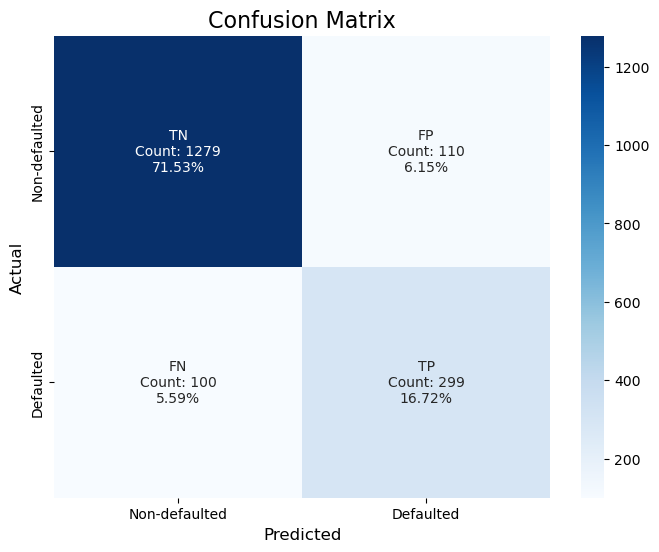

In [14]:
# Evaluate the model with threshold of 0.32
optimal_threshold = 0.32
y_pred_proba_optimal = logistic_regression_model.predict_proba(X_test_scaled)[:, 1]
metrics_score(y_test, y_pred_proba_optimal > optimal_threshold)

**Findings**: After changing the threshold, we can now see a balance in recall and precision with better performance as well.

- The False Negatives decreases around 50 which is good as the model now able te better classificy defaulted cases as defaulted. 

**Key Concepts**

- **Logistic Regression**: Logistic Regression is a supervised machine learning model that is used for binary classification to predict the outcome of yes/no from input features. The outcome is in probability from 0 to 1 with defined threshold (if probability > 0.5, classify as class 1). 

    - Logistic Regression uses **Sigmoid Function** with the input from the weighted sum of linear equations (coefficients with features) then calculate the probability of each instance. 

    - It learns to adjust the coefficient by minimizing how confident and wrong the predictions are.

    - If the true label is 1, and your predicted probability is close to 0, the loss is very high.

    - If the true label is 0, and your predicted probability is close to 1, the loss is also very high.

    - The **Sigmoid Function** produces probabilities between 0 and 1 from the input of linear combination of the input features. 

        - This means that when the **Coefficients** increase, the log-odds of the outcome from the probabilities also increases. 

        - A negative coefficient decreases the log-odds (and decreases in probability.)

In [15]:
# Check for feature importance of the logistic regression model
coef_df = pd.DataFrame({
    "feature": X_test_encoded.columns,
    "coefficient": logistic_regression_model.coef_[0],
    "odds_ratio": np.exp(logistic_regression_model.coef_[0])
})
coef_df = coef_df.sort_values(by="odds_ratio", ascending=False)
coef_df

,feature,coefficient,odds_ratio
20,debt_income_ratio_missing_flag,1.030447,2.802318
5,num_delinquencies,0.808450,2.244427
19,num_credit_lines_missing_flag,0.688567,1.990860
11,property_value_missing_flag,0.626162,1.870417
9,debt_income_ratio,0.617146,1.853631
4,num_derogatory,0.437862,1.549390
2,property_value,0.261209,1.298499
7,num_inquiries,0.253579,1.288629
17,credit_age_missing_flag,0.224729,1.251983
27,job_type_Sales,0.219673,1.245669


**Findings**: From the coefficient of the model on each features, we have found that:

**Strongest Predictors of Higher Default Risk (Positive Coefficients)**:

- `debt_income_ratio_missing_flag`: This feature has the highest positive coefficients, indicating a strong influence on the risk of defaulting.

    - With its odds ratio of 2.80, this means that applicants with missing debt income values are 2.8 times more likely to default.

    - Suggesting that missing financial data is a significant red flag.

**Strongest Predictors of Lower Default Risk (Negative Coefficients)**

- `num_derogatory_missing_flag`: This feature has the lowest coefficients (-0.66 with odds ratio of 0.51).

    - It means that applicants without derogatory mark information are less likely to default.

#### **Decision Tree**

**`Decision Tree` :** It is a supervised machine learning method used for **classification** and **regression tasks.** The goal is to create a model that predicts the value of a target variable by learning **simple decision rules** inferred from the data features. 

- **Decision Trees**  do not assum any specific shape or distribution in the data.
    
    - They do not learn from parameters (non-parametric model)
    
    - They learn from rules based directly on the data
   
    - So there is no gradient descent used here.

- **Decision Trees** can handle high-dimensional data with good accuracy.

- But it can become too complext and lead to overfitting.

**`Goal`:** The goal is to split the dataset in a way that the **child nodes** are as pure as possible, meaning each node contains one class. 

→ To do that, the algorithm evaluates each feature and chooses the one that creates the **best split.** Here is work it works step by step:

- **Step 1: Find the Root Node**
    
    - The algorithm evaluates **all features** and **all possible splits .**
    
    - It calculates the impurity (Gini or Entropy) after splitting.
       
        - For categorical features it will be Yes/No, True/False.
        
        - For numerical features, it will find the mean of two rows together then continuously split to find the results.
   
    - It then computes **weighted average impurity (left + right side of the split) .**
   
    - The split with the l**owest weighted impurity** (or highest information gain) is chosen.
   
    - The feature becomes the **root node** of the tree.

- **Step 2: Create Decision Nodes (Recursive Splitting)**
   
    - For **each branch** (left and right from the root), it repeats the same process:
        
        - Consider the remaining data in that node
       
        - Try all features and split points
       
        - Calculate **weighted impurity** for each possible split
       
        - Choose the best split again which becomes the **decision node**.
   
    - This process **recursively continues** down the tree.

- **Step 3: Stop at Leaf Nodes**
    
    - A node become a leaf when:
       
        - All sample belong to the **same class** (pure node) or
       
        - The stopping criteria are met (**max depth, min samples, no more gain**)
    
    - Leaf nodes are the **final predictions**.

In [16]:
# Use the training set without scaling (just encoded)
X_train_no_scaled = X_train_encoded.copy()
X_test_no_scaled = X_test_encoded.copy()

# Define the decision tree model 
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the training data
decision_tree_model.fit(X_train_no_scaled, y_train)

DecisionTreeClassifier(random_state=42)

Classification Report of the Predictions:

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1389
           1       0.73      0.67      0.70       399

    accuracy                           0.87      1788
   macro avg       0.82      0.80      0.81      1788
weighted avg       0.87      0.87      0.87      1788

Classification Metric Scores:

   Accuracy  Precision    Recall  F1 Score
0  0.871924    0.82041  0.799669  0.809231


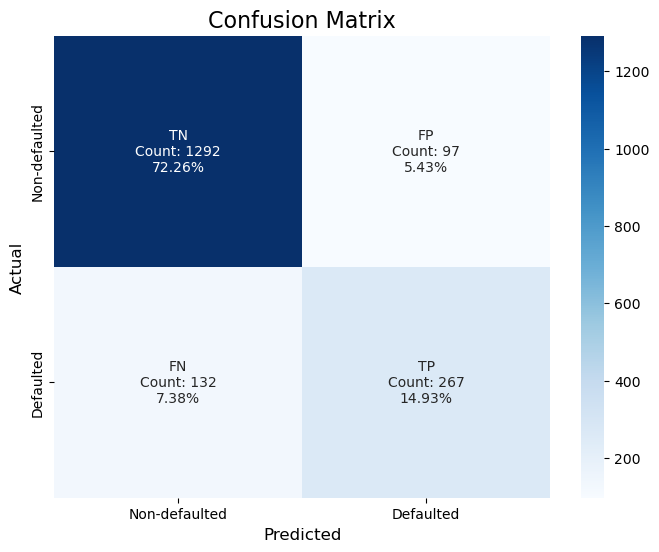

In [17]:
# Make predictions and check performance 
y_pred_dt = decision_tree_model.predict(X_test_no_scaled)
metrics_score(y_test, y_pred_dt)

Classification Report of the Predictions:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3382
           1       1.00      1.00      1.00       790

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172

Classification Metric Scores:

   Accuracy  Precision  Recall  F1 Score
0       1.0        1.0     1.0       1.0


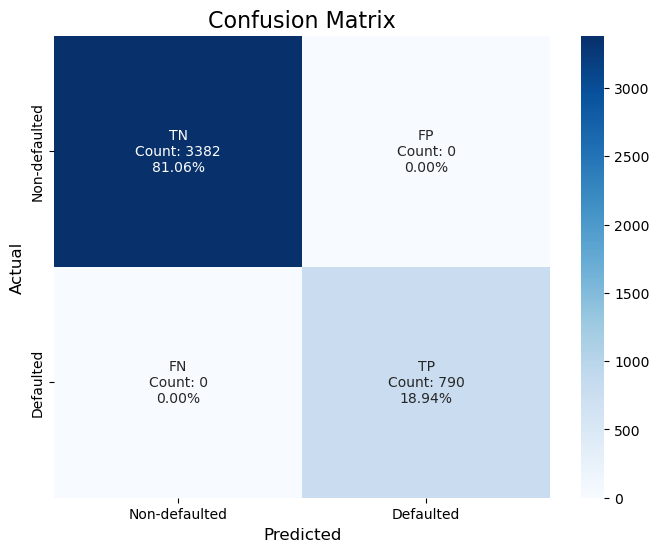

In [18]:
# Check the performance on training set to identify overfitting
y_pred_train_dt = decision_tree_model.predict(X_train_encoded)
metrics_score(y_train, y_pred_train_dt)

**Findings**: We can see that the **Decision Tree Classified** performs better on the training dataset as all the metric scores are 1 which indicates a sign of overfitting.

In [19]:
# Check the parameters of the model
print("Decision Tree Model Parameters:")
decision_tree_model.get_params()

Decision Tree Model Parameters:


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [20]:
# Try hyperparameter tuning on the decision tree model 
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [5, 7, 10, 15],
    "min_samples_leaf": [5, 10, 15, 20]
}

# Run gridsearch cross-validation with f1 score 
dt_model = DecisionTreeClassifier(class_weight="balanced", random_state=42)
grid_search_dt = GridSearchCV(dt_model, param_grid, scoring="recall_macro", cv=5, n_jobs=-1, verbose=1)

# Fit the grid search on training data
grid_search_dt.fit(X_train_no_scaled, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 10, 15],
                         'min_samples_leaf': [5, 10, 15, 20]},
             scoring='recall_macro', verbose=1)

In [21]:
# Get the best parameters and score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_
print("Best Parameters for Decision Tree Model:", best_params_dt)
print("Best Recall Score for Decision Tree Model:", best_score_dt)

Best Parameters for Decision Tree Model: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 5}
Best Recall Score for Decision Tree Model: 0.8174979479737354


Classification Report of the Predictions:

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1389
           1       0.62      0.79      0.70       399

    accuracy                           0.85      1788
   macro avg       0.78      0.83      0.80      1788
weighted avg       0.87      0.85      0.85      1788

Classification Metric Scores:

   Accuracy  Precision    Recall  F1 Score
0  0.845078   0.777439  0.827049  0.795999


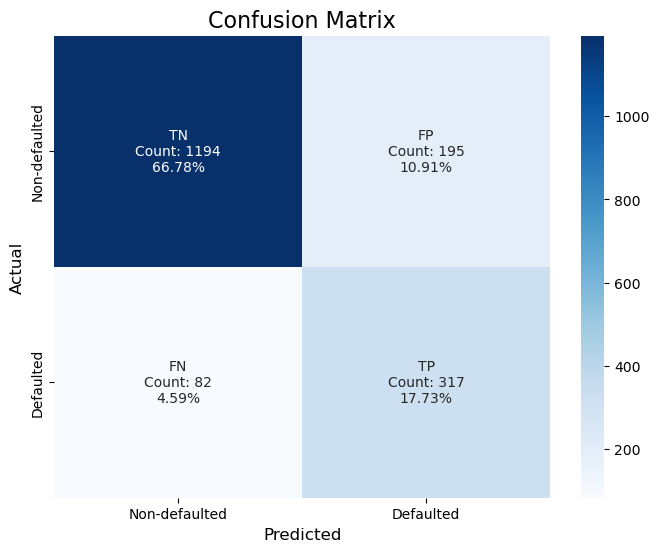

In [22]:
# Get the best estimator
dt_tuned_model = grid_search_dt.best_estimator_

# Fit the tuned model on the training data
dt_tuned_model.fit(X_train_no_scaled, y_train)

# Make predictions with the tuned model
y_pred_dt_tuned = dt_tuned_model.predict(X_test_no_scaled)

# Check the performance of the tuned model
metrics_score(y_test, y_pred_dt_tuned)

**Findings**: After tuning the parameters of the decision tree classifier model with a focused metric on **Recall**, we can now see that:

- The model is able to predict the defaulted class better as there is an increase in recall from 0.80 to 0.83.

- The False Negative is now also lower to only around 4% which means that the model is now less likely to predict Defaulted class as Non defaulted, but risk wrong prediction on Non-defaulted class to Defaulted class (High False Positive - Low Precision)

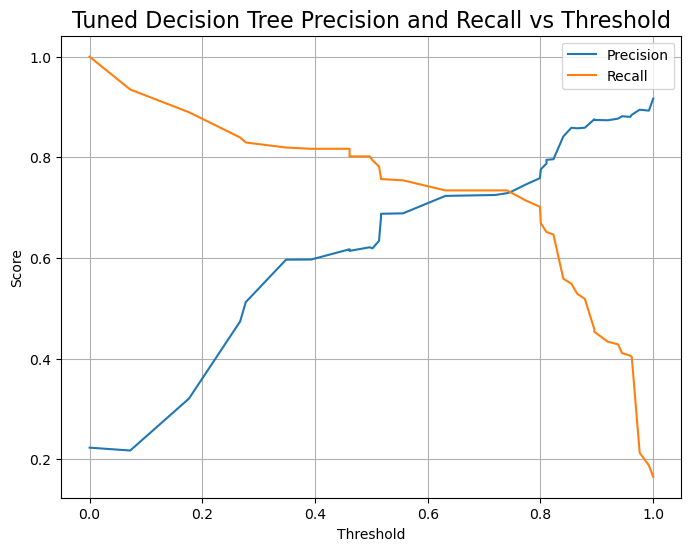

In [23]:
# Get the PR curve
y_pred_dt_proba_tuned = dt_tuned_model.predict_proba(X_test_no_scaled)[:, 1]
plot_precision_recall(y_test, y_pred_dt_proba_tuned, "Tuned Decision Tree")

/var/folders/xt/rw6hqx7d067gnrmlwsmxnbzh0000gn/T/ipykernel_24161/584646345.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_dt, x="importance", y="feature", palette="viridis")


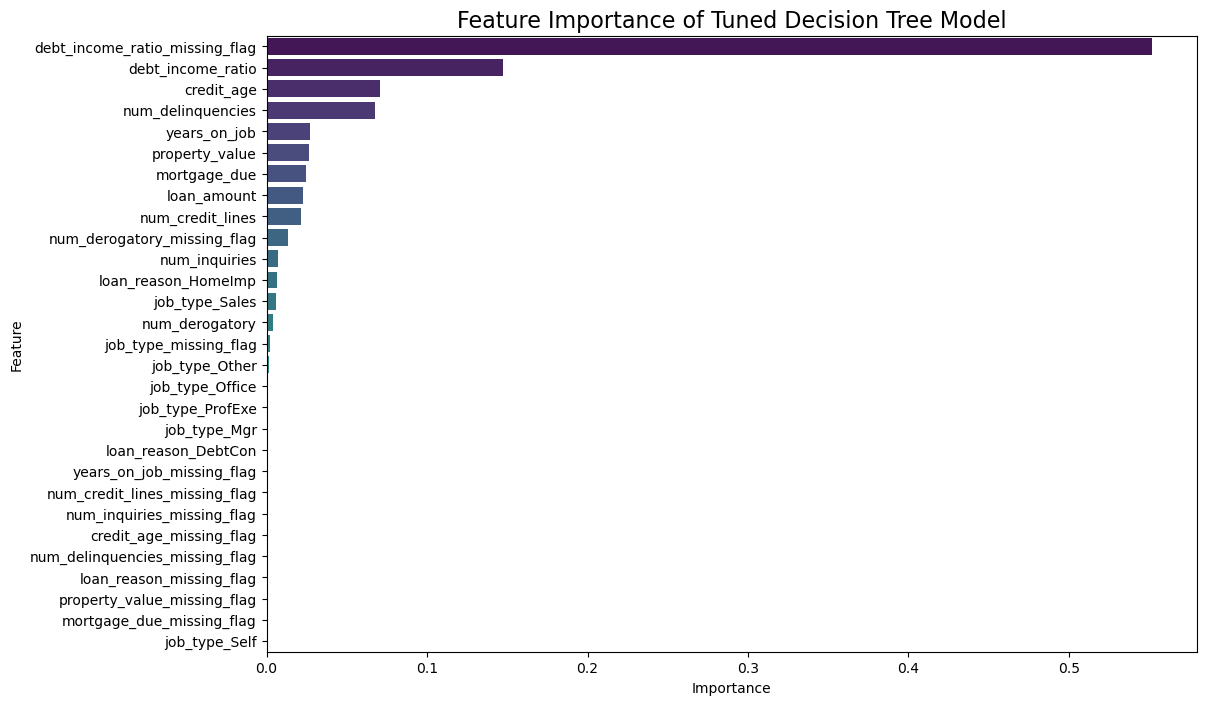

In [24]:
# Check the feature importance of the tuned decision tree model
feature_importance_dt = pd.DataFrame({
    "feature": X_test_no_scaled.columns,
    "importance": dt_tuned_model.feature_importances_
}).sort_values(by="importance", ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_dt, x="importance", y="feature", palette="viridis")
plt.title("Feature Importance of Tuned Decision Tree Model", fontsize=16)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

**Findings**: Based on the feature importance above, we can still see that:

- `debt_income_ratio_missing_flag` is still the most influential feature amongst others in leading to defaulted loan. 

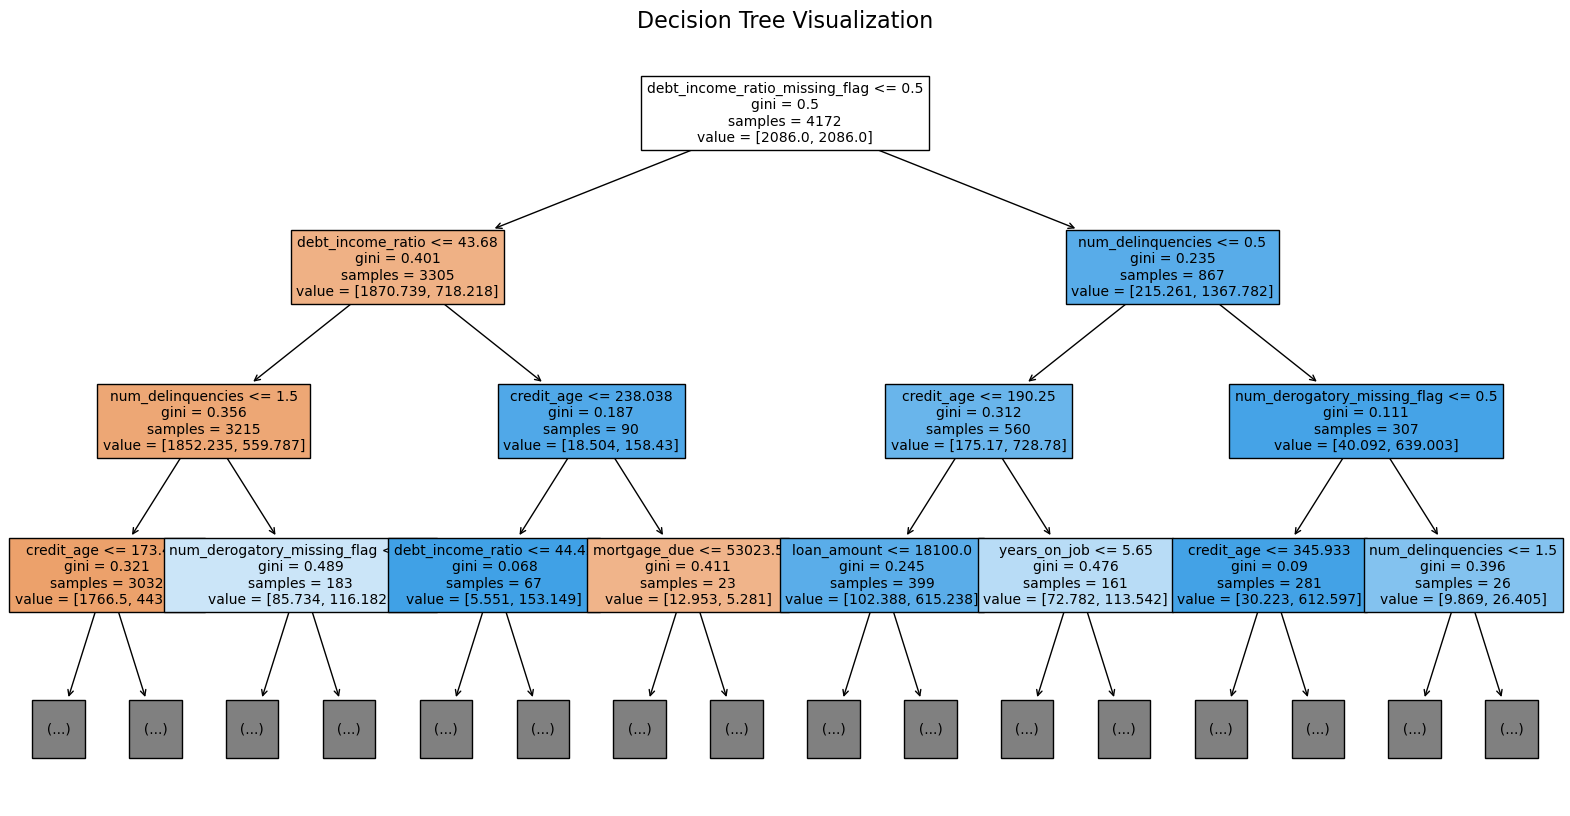

In [25]:
# Plot the decision tree
features = list(X_train_no_scaled.columns)
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_tuned_model, max_depth=3, feature_names=features, filled=True, fontsize=10)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

#### **Random Forest Classifier**

→ **`Random Forest`** is a supervised learning algorithm that can be used for both classification and regression tasks. To put it simply:

- Random Forest builds **multiple decision tress and merges** them together to get a more accurate and stable prediction.

- Each tree is like a **mini-expert** that gives you advice. But each tree is a bit different because it is trained on different parts of the data.

- **Random Forest** prevents overfitting by randomly selects **observations and features** to build several decision tress and then average the results.

- **How It Works Step-by-Step**
    
    - **Boostrap Sampling:**
        
        - **Random Forest** picks ramdom samples from your data with replacement (some rows may appear more than once)
        
        - This means some data points are not selected in that sample
            
            - These **left-out data points are called `Out-of-Bag`**
            
            - We use them to check how good that tree is from unseen data and by combining these checks, we get a reliable accuracy estimate for the whole Random Forest
    
    - **Grow Multiple Trees:**
        
        - For each sample, it builds a decision tree
        
        - But when splitting at each node in the tree, it picks from a ramdom subsets of features instead of all features.
        
        - This can add **diversity** to the trees making the model generalize well.
    
    - **Voting / Averaging:**
        
        - For classification, each tree votes for a class, and the majority wins
        
        - For regression, it averages the value predicted by all the trees
    
    - In other words:
       
        - We first build the Random Forest with Bootstrap and Aggregating
        
        - Estimate the accuracy of a Random Forest with OOB
            
            - Change the number of variables used per step

In [26]:
# Initialize Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Fit the model on training data
random_forest_model.fit(X_train_no_scaled, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

Classification Report of the Predictions:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1389
           1       0.87      0.69      0.77       399

    accuracy                           0.91      1788
   macro avg       0.89      0.83      0.86      1788
weighted avg       0.90      0.91      0.90      1788

Classification Metric Scores:

   Accuracy  Precision    Recall  F1 Score
0  0.907159   0.891606  0.829493  0.855057


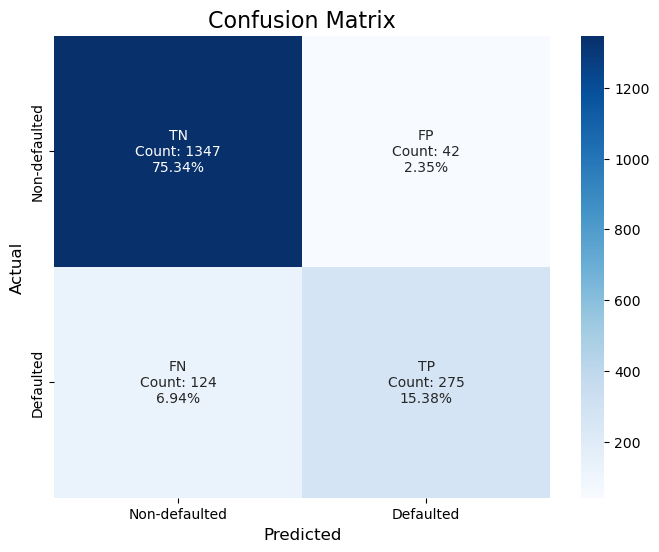

In [27]:
# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test_no_scaled)
metrics_score(y_test, y_pred_rf)

**Findings**: Random Forest Classifier is performing better at making prediction on unseen data than Tuned Decision Tree model as the F1 Score is 0.84 and Recall Score without tuning is already 0.82.

Classification Report of the Predictions:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3382
           1       1.00      1.00      1.00       790

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172

Classification Metric Scores:

   Accuracy  Precision  Recall  F1 Score
0       1.0        1.0     1.0       1.0


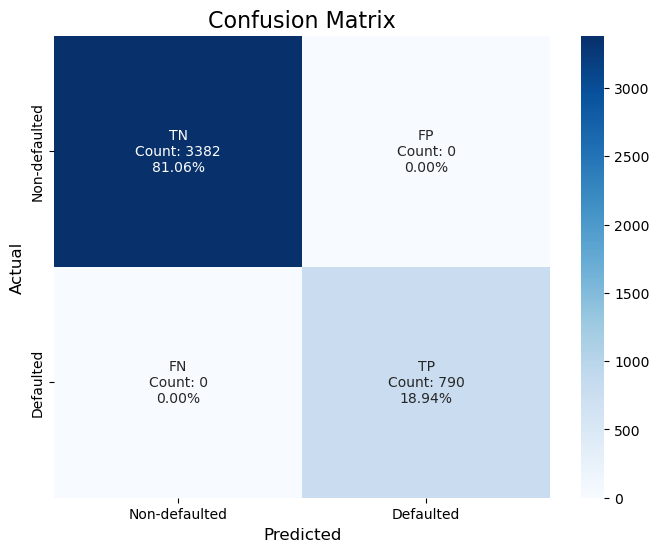

In [28]:
# Check the performance on training set to identify overfitting
y_pred_train_rf = random_forest_model.predict(X_train_no_scaled)
metrics_score(y_train, y_pred_train_rf)

**Findings**: Based on the performance of the Random Forest Classifier on the training set, we can compare to the testing set and able to see that the model is overfitting.

In [29]:
# Try hyperparameters tuning on the Random Forest Classifier Model
param_grid = {
    "n_estimators": [100, 125, 150, 200],
    "max_depth": [5, 7, 10],
    "max_features": ["sqrt", "log2"],
    "min_samples_leaf": [5, 10, 15]
}

# Base estimator 
rf_base_model = RandomForestClassifier(random_state=42, class_weight="balanced")

# Make recall score to put more strict on class 1 
scorer = make_scorer(recall_score, pos_label=1)

# Run gridsearch cross-validation with f1 score 
grid_search_rf = GridSearchCV(rf_base_model, param_grid, scoring=scorer, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search on training data
grid_search_rf.fit(X_train_no_scaled, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15],
                         'n_estimators': [100, 125, 150, 200]},
             scoring=make_scorer(recall_score, response_method='predict', pos_label=1),
             verbose=1)

In [30]:
# Get the best parameters and score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
print("Best Parameters for Random Forest Model:", best_params_rf)
print("Best Recall Score for Random Forest Model:", best_score_rf)

Best Parameters for Random Forest Model: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'n_estimators': 125}
Best Recall Score for Random Forest Model: 0.7822784810126583


Classification Report of the Predictions:

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1389
           1       0.67      0.80      0.73       399

    accuracy                           0.87      1788
   macro avg       0.80      0.84      0.82      1788
weighted avg       0.88      0.87      0.87      1788

Classification Metric Scores:

   Accuracy  Precision    Recall  F1 Score
0  0.866331   0.803135  0.843407  0.819742


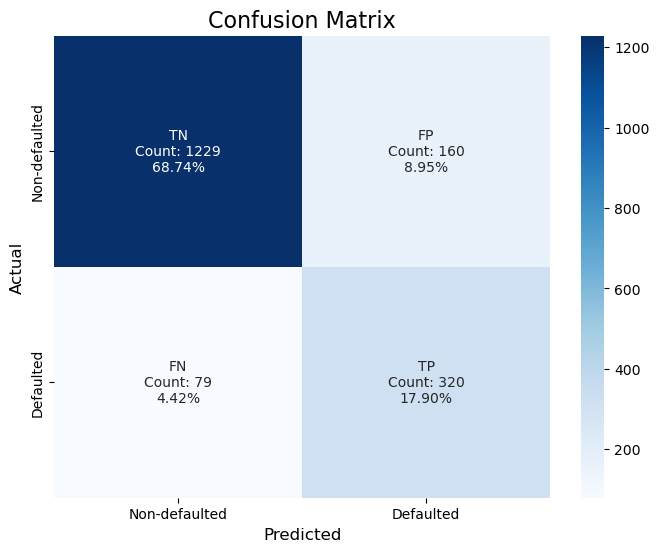

In [31]:
# Get the best estimator
rf_tuned_model = grid_search_rf.best_estimator_

# Fit the tuned model on the training data
rf_tuned_model.fit(X_train_no_scaled, y_train)

# Make predictions with the tuned model
y_pred_rf_tuned = rf_tuned_model.predict(X_test_no_scaled)

# Check the performance of the tuned model
metrics_score(y_test, y_pred_rf_tuned)

**Findingss**: Comparing the Tuned Random Forest Model to the Tuned Decision Tree Model, we have found that:

- The overall `F1 Score Macro` is better than the decision tree model, indicating a better performance as now the precision and recall score are higher. 

- The recall score on class defaulted is also hgiher than decision tree for 0.01 but with a higher precision as well.

- Overall, the Random Forest Classifier is doing better than Decision Tree Classifier.

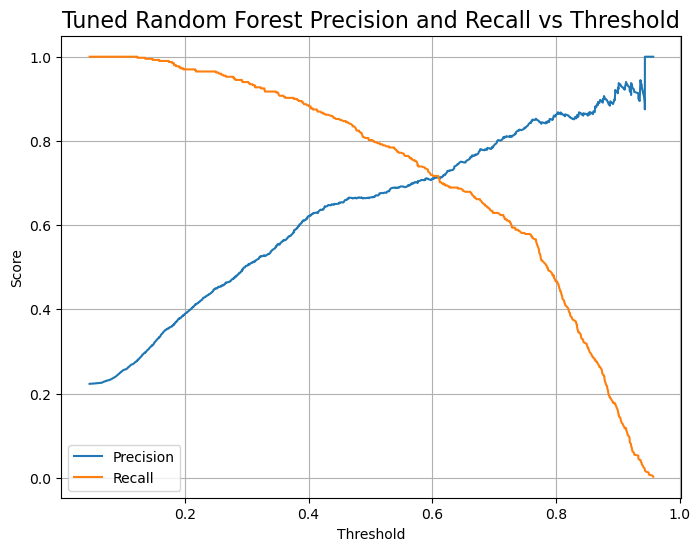

In [32]:
# Get the PR curve
y_pred_rf_proba_tuned = rf_tuned_model.predict_proba(X_test_no_scaled)[:, 1]
plot_precision_recall(y_test, y_pred_rf_proba_tuned, "Tuned Random Forest")

/var/folders/xt/rw6hqx7d067gnrmlwsmxnbzh0000gn/T/ipykernel_24161/2812949590.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_rf, x="importance", y="feature", palette="viridis")


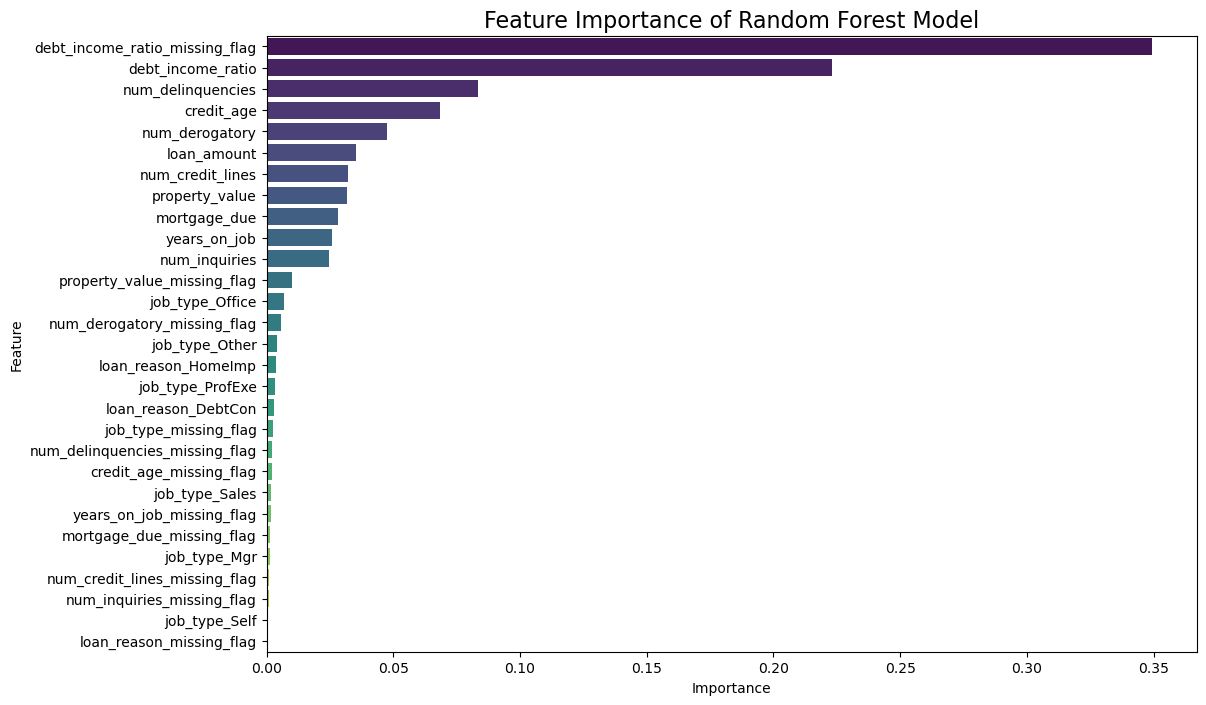

In [33]:
# Check the feature importance of the tuned decision tree model
feature_importance_rf = pd.DataFrame({
    "feature": X_test_no_scaled.columns,
    "importance": rf_tuned_model.feature_importances_
}).sort_values(by="importance", ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_rf, x="importance", y="feature", palette="viridis")
plt.title("Feature Importance of Random Forest Model", fontsize=16)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

#### **XGBoost Model**

→ **`XGBoost` :**  **eXtreme Gradient Boosting** is a supervised machine learning algorithm under **ensemble learning.** It builds predictive model by combining the predictions of multiple individuals models, often decision trees, in an iterative manner.

- It is like a **team of decision trees** that learn from the **mistakes** of the previous one. This process is called as **`Boosting`**

- **Boosting:** It is a method where many weak learners like small decision trees are added one by one, and each one tries to fix the mistakes made by the ones before it.
    
    - Make a weak prediction
    
    - See where it went wrong
    
    - Build another model to fix the errors
    
    - Repeat this many times
    
    - Add all the small models together to make one strong model

In [34]:
# Initialize Boosting Classifier with XGBoost
xgb = XGBClassifier(random_state=42)

# Fit the model on training data
xgb.fit(X_train_no_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Classification Report of the Predictions:

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1389
           1       0.90      0.74      0.81       399

    accuracy                           0.92      1788
   macro avg       0.91      0.86      0.88      1788
weighted avg       0.92      0.92      0.92      1788

Classification Metric Scores:

   Accuracy  Precision    Recall  F1 Score
0  0.923937    0.91455  0.859048  0.882717


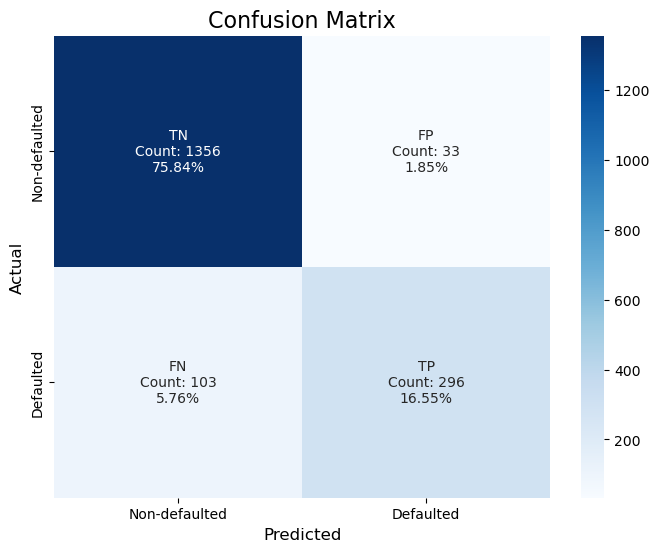

In [35]:
# Make predictions on the test set
y_pred_xgb = xgb.predict(X_test_no_scaled)

# Check the performance of the XGBoost model
metrics_score(y_test, y_pred_xgb)

**Findings**: Based on the prediction of the XGBoost Model on the testing set and comparison with the previous models, we have found that:

- The base XGBoost Model is having the best performance amongst the others model.

- With Macro Score of Precision to 0.91, Recall to 0.86 and F1 to 0.89, XGBoost Model is doing well with predicting the unseen data.

- We can also see that the number of False Negative is also lower than other models as well. 

Classification Report of the Predictions:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3382
           1       1.00      1.00      1.00       790

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172

Classification Metric Scores:

   Accuracy  Precision    Recall  F1 Score
0  0.999521   0.999704  0.998734  0.999218


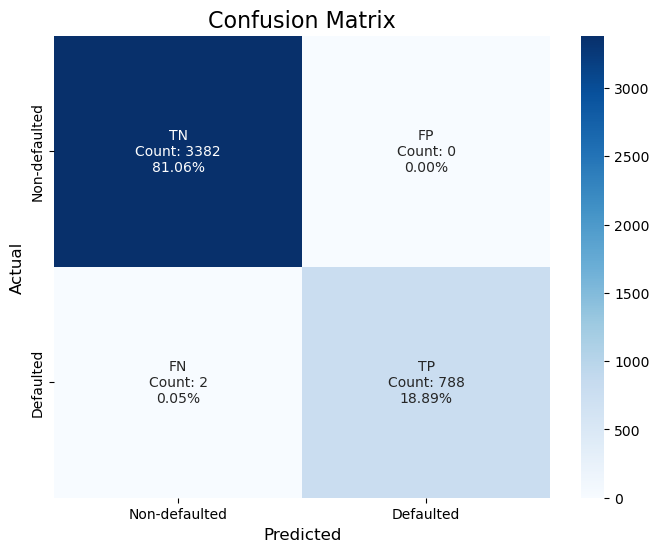

In [36]:
# Check the performance on training set to identify overfitting
y_pred_train_xgb = xgb.predict(X_train_no_scaled)
metrics_score(y_train, y_pred_train_xgb)

In [37]:
# Try hyperparameters tuning on the XGBoost Model
param_grid = {
    'n_estimators': [50, 100, 150, 200],          
    'max_depth': [3, 5, 7],                   
    'learning_rate': [0.01, 0.1],                                            
}

# Base estimator 
from collections import Counter
counter = Counter(y_train)
scale_pos_weight = counter[0] / counter[1]

xgb_base_model = XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight)

# Make recall score to put more strict on class 1 
scorer = make_scorer(recall_score, pos_label=1)

# Run gridsearch cross-validation with f1 score 
grid_search_xgb = GridSearchCV(xgb_base_model, param_grid, scoring=scorer, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search on training data
grid_search_xgb.fit(X_train_no_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150, 200]},
             scoring=make_scorer(recall_score, response_method='predict', pos_label=1),
             verbose=1)

In [38]:
# Get the best parameters and score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_
print("Best Parameters for XGBoost Model:", best_params_xgb)
print("Best Recall Score for XGBoost Model:", best_score_xgb)

Best Parameters for XGBoost Model: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Recall Score for XGBoost Model: 0.8227848101265822


Classification Report of the Predictions:

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1389
           1       0.75      0.85      0.80       399

    accuracy                           0.90      1788
   macro avg       0.85      0.88      0.87      1788
weighted avg       0.91      0.90      0.90      1788

Classification Metric Scores:

   Accuracy  Precision    Recall  F1 Score
0  0.902685   0.851911  0.882882  0.865732


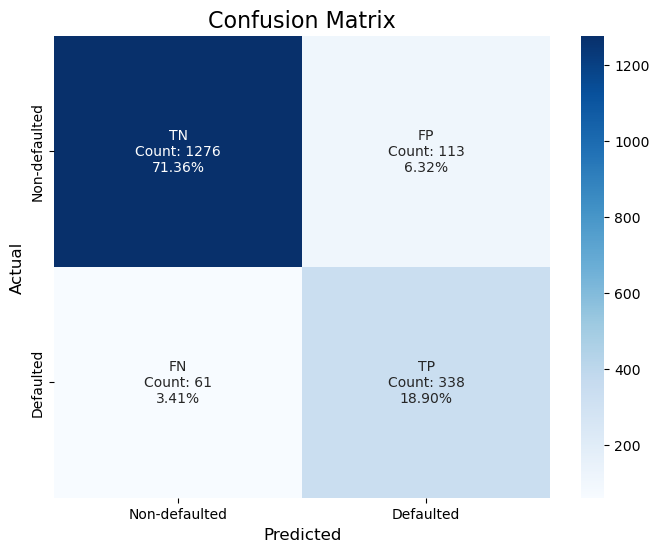

In [39]:
# Get the best estimator
xgb_tuned_model = grid_search_xgb.best_estimator_

# Fit the tuned model on the training data
xgb_tuned_model.fit(X_train_no_scaled, y_train)

# Make predictions with the tuned model
y_pred_xgb_tuned = xgb_tuned_model.predict(X_test_no_scaled)

# Check the performance of the tuned model
metrics_score(y_test, y_pred_xgb_tuned)

In [40]:
# Try predicting on one instance of testing set
y_pred = xgb_tuned_model.predict(X_test_no_scaled.iloc[10:11])
y_pred_probab = xgb_tuned_model.predict_proba(X_test_no_scaled.iloc[10:11])
print(f"Predicted class for the instance: {y_pred[0]}")
print(f"Predicted probability for the instance: {y_pred_probab}")

Predicted class for the instance: 0
Predicted probability for the instance: [[0.9690528  0.03094722]]


Classification Report of the Predictions:

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      3382
           1       0.75      0.90      0.81       790

    accuracy                           0.92      4172
   macro avg       0.86      0.91      0.88      4172
weighted avg       0.93      0.92      0.93      4172

Classification Metric Scores:

   Accuracy  Precision    Recall  F1 Score
0  0.922579   0.860303  0.912471  0.882679


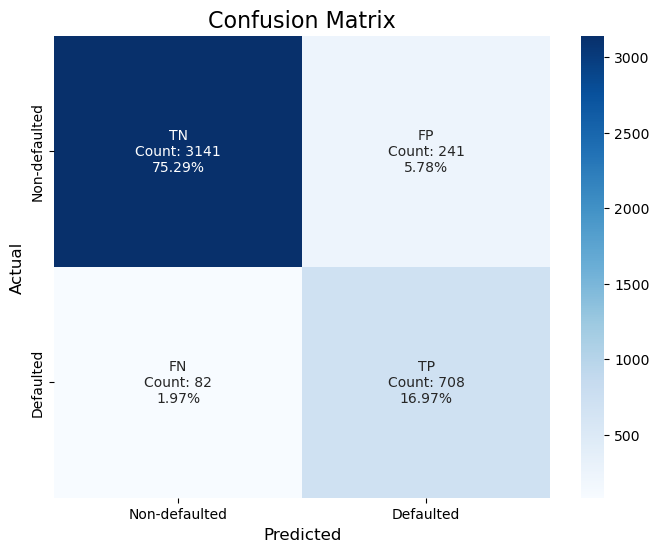

In [41]:
# Make predictions with the tuned model on training set
y_pred_xgb_tuned_train = xgb_tuned_model.predict(X_train_no_scaled)

# Check the performance of the tuned model
metrics_score(y_train, y_pred_xgb_tuned_train)

**Findings**: Based on the comparison between the base and the tuned XGBoost Model, we have found that:

- We put more strict on Defaulted Class now as the False Negative is down to nearly 50% to just 61 cases. 

- We risk lowering the precision as the False Positive is higher now but we also predict defaulted classes better as well.

- This depends on the business requirements but it can be customizable further to fit each case.

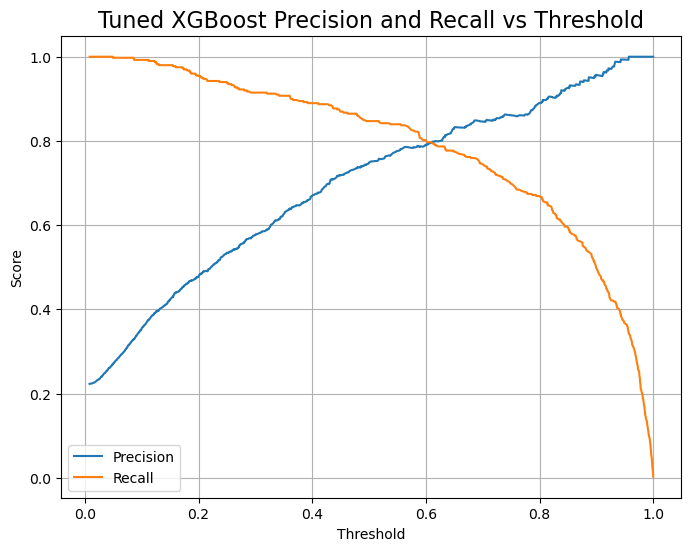

In [42]:
# Get the PR curve
y_pred_xgb_proba_tuned = xgb_tuned_model.predict_proba(X_test_no_scaled)[:, 1]
plot_precision_recall(y_test, y_pred_xgb_proba_tuned, "Tuned XGBoost")

**Findings**: The Precision-Recall Curve definitly shows that XGBoost Classifier is having the best performance than other models as we can see that Precision and Recall have higher values and well-balanced.

/var/folders/xt/rw6hqx7d067gnrmlwsmxnbzh0000gn/T/ipykernel_24161/3823398718.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_xgb, x="importance", y="feature", palette="viridis")


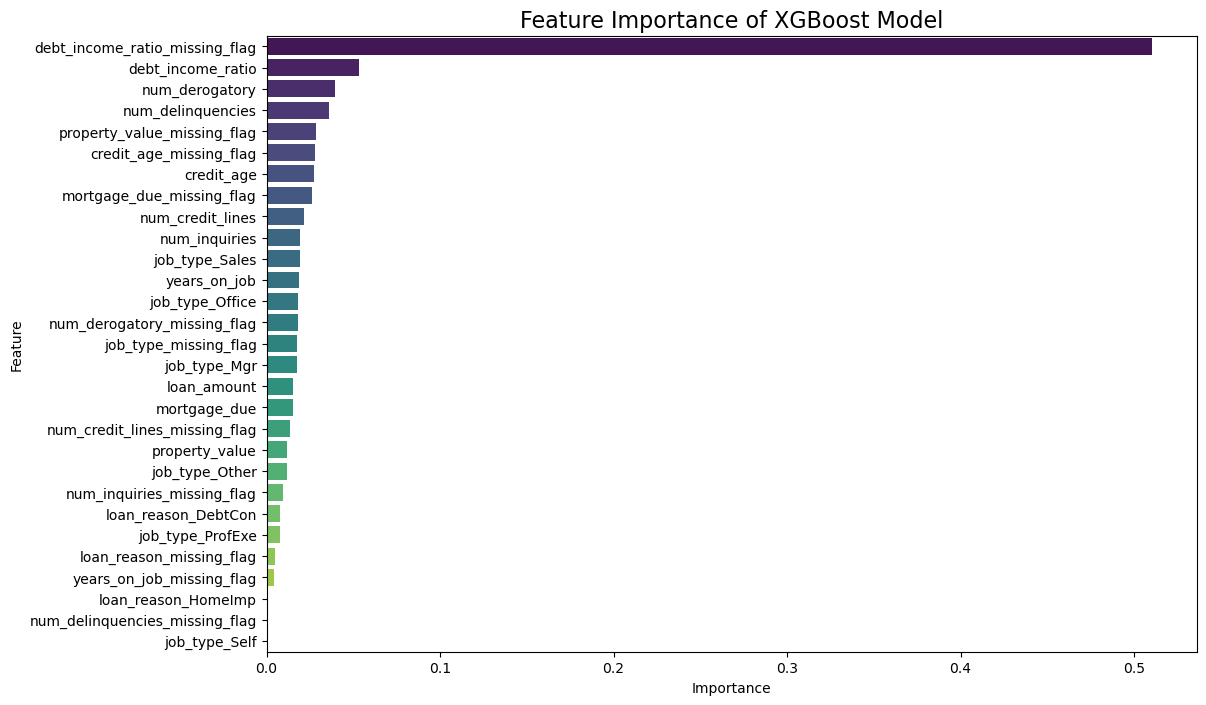

In [43]:
# Get feature importances
feature_importance_xgb = pd.DataFrame({
    "feature": X_test_no_scaled.columns,
    "importance": xgb_tuned_model.feature_importances_
}).sort_values(by="importance", ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_xgb, x="importance", y="feature", palette="viridis")
plt.title("Feature Importance of XGBoost Model", fontsize=16)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

#### **Imbalanced Dataset Handling**

In [44]:
from imblearn.pipeline import make_pipeline

xgb_bal = make_pipeline(SMOTE(random_state=42), XGBClassifier(random_state=42))

# Fit the model on training data
xgb_bal.fit(X_train_no_scaled, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

Classification Report of the Predictions:

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1389
           1       0.92      0.81      0.86       399

    accuracy                           0.94      1788
   macro avg       0.93      0.90      0.91      1788
weighted avg       0.94      0.94      0.94      1788

Classification Metric Scores:

   Accuracy  Precision    Recall  F1 Score
0  0.941834   0.932791  0.895576  0.912437


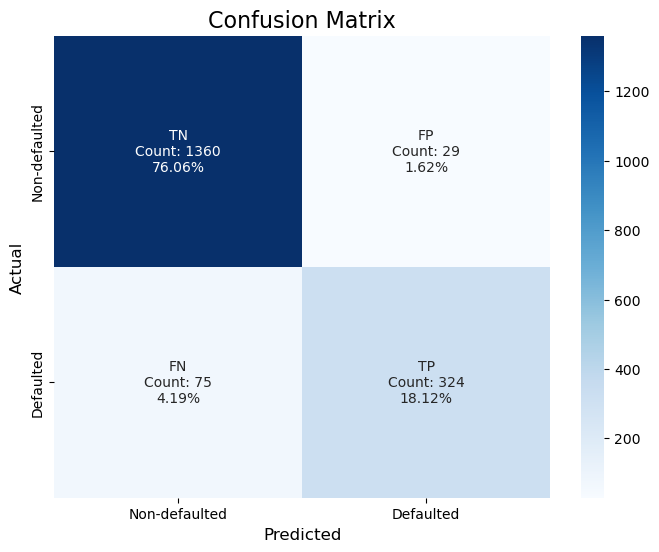

In [45]:
# Make predictions on testing set
y_pred_xgb_bal = xgb_bal.predict(X_test_no_scaled)

# Check the performance of the balanced XGBoost model
metrics_score(y_test, y_pred_xgb_bal)

**Findings**: After addressing the class imbalance, the overall F1 score has improved compared to the original tuned XGBoost model. However, the recall score for Class 1 has decreased to 0.80, which also corresponds to an increase in false negatives.

- A potential reason why the original tuned model achieved a higher recall for Class 1 could be the use of the scale_pos_weight parameter set before performing GridSearchCV. This parameter makes the model more sensitive to the minority class, potentially improving recall performance for that class.

#### **Save Model**

In [46]:
# Save the XGBoost Model
saved_model_path = "../models/xgb_model_loan_defauting_prediction.pkl"
joblib.dump(xgb_tuned_model, saved_model_path)

# Sava features columns
features_path = "../models/xgb_model_features.pkl"
joblib.dump(X_test_no_scaled.columns, features_path)

['../models/xgb_model_features.pkl']

#### **Conclusions**

**Summary**: Our goal of this project is work with the Home Equity Loan Dataset with Defaulted and Non-defaulted cases so that we can learn from the patterns and gather insights on which features and variables that play an important role in contributing to loan defaulting, helping to prevent business loss for the lenders or financial institutions. We have explored, visualized, and built machine learning models to learn and be able to predict on unseen loan application data to test and evaluate the performance. 

- **Exploratory Data Analysis**: Based on the exploratory data analysis that we have done, these are the key insights that we have found.

    - The target variable is highly imbalanced with Non-defaulted class (class 0) about 80% and Defaulted class (class 1) only 20%. 

    - Financial histories and behaviors features play more role in leading to defaulted cases as they show strong correlation with the target variable and also during the modeling with feature importance. 

- **Model Development**: After exploring the dataset, we then proceeded with building and testing various supervised learning models to identify which fits the most to our requirment.

    - **Requirements**: We know that Non-performing loans can lead to tremendous loss for the businesses when the borrowers are not able to pay back the loans. We might risk predicting wrong on the actual case of non-defaulting to defaulting better than risk predicting wrong on actual as defaulting and predicted as non-defaulting. 

    - In this way, we need to maximize and focus on having high values on Class 1 Recall Score as this will lead to low False Negatives, solving the businesses' problems on having defaulting loan applications. 

    - We have built and tested the dataset on Logistic Regression, Decision Tree, Random Forest, and XGBoost. Out of these models, XGBoost Tuned Classifier is having the best performance on Class 1 Recall score of 0.85 with an overall F1 of 0.86 and Accuracy of 0.9.